In [6]:
#loading dataset 

import pandas as pd 
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
sns.set_palette("colorblind")
import os
import json
import urllib.request
import pickle
import datetime
import warnings
warnings.filterwarnings("ignore")
from sklearn.model_selection import train_test_split



%matplotlib inline
fig = plt.figure(figsize=(20,5))

print(os.getcwd())


def load_data(data_dir):
    
    data = pd.read_csv(data_dir)

    #make amount into log value  :: when predicting use np.expm1(amount) to make it back to original amount size
    data['amount'] = np.log(data["amount"]) #log0 error 방지 
    data['three_month'] = np.log(data["three_month"])
    data['four_month'] = np.log(data["four_month"])
    data['five_month'] = np.log(data["five_month"])
    data['six_month'] = np.log(data["six_month"])
    data['seven_month'] = np.log(data["seven_month"])
    data['eight_month'] = np.log(data["eight_month"])
    data['nine_month'] = np.log(data["nine_month"])
    data['ten_month'] = np.log(data["ten_month"])
    data['eleven_month'] = np.log(data["eleven_month"])
    data['twelve_month'] = np.log(data["twelve_month"])
    
    
    #drop store 795
    l = data.loc[(data.store_id == 795)].index
    data.drop(index=l, inplace=True)
    
    
    #one-hot-encoding ##
#     data = pd.get_dummies(data, columns = ['store_id']) 
    #'year','month' : not ordered store_id may need one hot encoding 
    #but year, month has order 
    
    #make values to category 
    data['store_id'] = data['store_id'].astype('category')
    data['month'] = data['month'].astype('category')
    
    #delete category and use train test split to split dataset 
    test = data[data['category']== 'test']
    data =data[data['category']!= 'test']
    
    del data['category']
    del test['category']
#     #split train/val/test
#     train = data[data['category'] == 'train']
#     val = data[data['category']=='val']
    
    X = data[['store_id', 'year', 'month', 'three_month', 
              'four_month','five_month','six_month', 
              'seven_month', 'eight_month', 'nine_month', 
              'ten_month','eleven_month','twelve_month']]
    
    y =data['amount']
    
    X_train, X_val, y_train, y_val = train_test_split(X, y , 

                                                    test_size=0.2, 

                                                    shuffle=True,

                                                    stratify=data['store_id'], 

                                                    random_state=1004)


    
    
    return  X_train, X_val, y_train, y_val,test 
    
    




######NEWNEWNEWNENW########## 

X_train, X_val, y_train, y_val,test  = load_data('/Users/janechoi/Desktop/연구학점/credit card/data/train_na_full_month.csv')



# X_train, X_val, y_train, y_val,test  = load_data('/Users/janechoi/Desktop/연구학점/credit card/data/train_mean_full_month.csv')

# X_train, X_val, y_train, y_val,test  = load_data('/Users/janechoi/Desktop/연구학점/credit card/data/train_median_full_month.csv')





# X_train, X_val, y_train, y_val,test  = load_data('/Users/janechoi/Desktop/연구학점/credit card/data/train_spline2_full_month.csv')

# X_train, X_val, y_train, y_val,test  = load_data('/Users/janechoi/Desktop/연구학점/credit card/data/train_spline3_full_month.csv')

# X_train, X_val, y_train, y_val,test  = load_data('/Users/janechoi/Desktop/연구학점/credit card/data/train_time_full_month.csv')



# X_train['store_id'].value_counts().index
X_train.shape
# X_train.isnull().sum()
X_train

/Users/janechoi/Desktop/연구학점/credit card/data


,store_id,year,month,three_month,four_month,five_month,six_month,seven_month,eight_month,nine_month,ten_month,eleven_month,twelve_month
2540,153,2017,11,13.154000,12.820293,13.173871,13.435086,12.823572,13.111591,12.547634,13.669533,13.112313,12.890611
33940,2082,2018,6,14.165252,14.010584,13.859158,14.172915,13.800991,13.718827,13.371921,13.325258,13.791247,13.774212
2638,160,2019,2,NaN,NaN,12.410645,13.353725,13.438664,13.526733,12.917831,12.243162,12.253910,12.303718
7558,459,2018,12,NaN,12.488563,12.902429,13.906656,13.501778,13.536741,13.640306,13.184667,13.688651,13.598243
29262,1790,2018,11,12.037443,10.940731,12.035115,12.386309,11.813823,12.538455,12.438884,11.736259,11.401196,12.531773
...,...,...,...,...,...,...,...,...,...,...,...,...,...
22825,1393,2017,12,12.976016,11.801429,13.016558,13.033532,13.234646,13.472094,13.063220,12.372616,12.092584,13.271694
14983,902,2018,1,12.244606,12.889169,13.251385,12.998419,12.555723,12.625722,12.863963,12.724016,12.799399,12.814284
14161,854,2017,11,13.371230,13.167337,13.561540,12.886641,13.262374,13.183324,13.155936,12.537430,13.544826,12.979812
21128,1285,2018,2,11.851436,11.888422,12.421184,12.378224,12.541013,12.669357,13.063523,12.780275,12.680086,12.505648


<Figure size 1440x360 with 0 Axes>

In [49]:

import lightgbm as lgb
from bayes_opt import BayesianOptimization
from sklearn.model_selection import GroupKFold
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import cross_val_score

#columns to be used 
avoid_cols = ['amount', 'category','year']
cols = [col for col in X_train.columns if col not in avoid_cols] #store_id, 3,6,12month, month 

#how to use CV 
skf = list(StratifiedKFold(n_splits=5,random_state=1008).split(X_train, X_train['store_id'])) 



#USING BAYESIAN OPTIMIZATION !!!!! 

def lgb_eval(num_leaves, max_depth, learning_rate, min_data_in_leaf,num_iteration,
            feature_fraction, lambda_l1, lambda_l2,bagging_fraction ):
    
    #Make lgbm dataset 
    
#     train_data = lgb.Dataset(data= X_train[cols].values, label=y_train)
#     valid_data = lgb.Dataset(X_val[cols].values, label=y_val)
    train = X_train[cols]
    val = X_val[cols]
    
    #select params to use 
    params = {'task':'train',
              'boosting_type':'gbdt', 
              'objective': 'regression',
              'early_stopping_round' : 100, #과적합방지 
              'eval_metric' : "mae",  
              'save_binary': True,
#               'eval_set': [(val, y_val)],
              'random_state': 314 , 
              'save_binary':True, 
              'metric':'mae'}

    
    #optimize parametes :: 
    params["num_leaves"] = int(round(num_leaves))
    params['max_depth'] = int(round(max_depth))
    params['learning_rate'] = learning_rate
    params['min_data_in_leaf'] = int(round(min_data_in_leaf))
    params['num_iteration'] = int(round(num_iteration))
    
    params['lambda_l1'] = max(lambda_l1, 0)
    params['lambda_l2'] = max(lambda_l2, 0)
    params['feature_fraction'] =  max(min(feature_fraction, 1), 0)
    params['bagging_fraction'] =max(min(bagging_fraction, 1), 0)
    
    
    
    #use cv to get result 
    
    res = lgb.LGBMRegressor(**params)
    best=[]
    #use skf for 5 fold seperatly 
    for fold_, (trn_, val_) in enumerate(skf):
#         print("Fold:",fold_)
    
        train_x, train_y = train.iloc[trn_], y_train.iloc[trn_]
        other_x, other_y = train.iloc[val_], y_train.iloc[val_]
    
        res.fit(train_x, train_y ,eval_set = [(val, y_val)],verbose=False)
    
        pred= res.predict(other_x, num_iteration=res .best_iteration_)
        #calculate mae on other train fold 
        mae_error = mean_absolute_error(np.exp(other_y), np.exp(pred))
    
        best.append(mae_error)
        
#     print(best)
    mean = np.mean(np.array(best))
#     print(mean)
    return  -(mean) #maximize :: minimize minus mae 


##RANDOM SEARCED PARAMETERS 
#                           bagging_fraction = 0.7693877551020408,
#                           feature_fraction = 0.8387755102040817,
#                           lambda_l1 = 4.26530612244898,
#                           lambda_l2 = 4.795918367346939,
#                           learning_rate = 0.054285714285714284,
#                           max_depth = 12,
#                           min_data_in_leaf = 72,
#                           num_iteration = 2165,
#                           num_leaves = 25)


# {'bagging_fraction': 0.5098148151047519,
#  'feature_fraction': 0.9213222136952909,
#  'lambda_l1': 2.74138343755092,
#  'lambda_l2': 1.1719827530187665,
#  'learning_rate': 0.016836928151360186,
#  'max_depth': 24.01175873348594,
#  'min_data_in_leaf': 55.150124817019226,
#  'num_iteration': 3494.338217031892,
#  'num_leaves': 51.46113159717336}

lgbBO = BayesianOptimization(lgb_eval, {'num_leaves': (20, 55),
                                        'max_depth': (10, 25),
                                        'learning_rate': (0.01, 0.07),
                                        'min_data_in_leaf':(54,100),
                                        'num_iteration': (2000,4000) , 
                                        'feature_fraction': (0.8, 1),
                                        'lambda_l1': (2, 5),
                                        'lambda_l2': (1, 5),
                                     'bagging_fraction': (0.5,0.8)},
                                        random_state= 0 )


#randomly use 10 initial points, and use bayesian for 1000 more rounds 
lgbBO.maximize(init_points=5, n_iter=100)  
lgbBO.max['params'] 


|   iter    |  target   | baggin... | featur... | lambda_l1 | lambda_l2 | learni... | max_depth | min_da... | num_it... | num_le... |
-------------------------------------------------------------------------------------------------------------------------------------
|  1        | -2.977e+0 |  0.7744   |  0.8576   |  3.014    |  2.724    |  0.02695  |  29.38    |  71.88    |  3.892e+0 |  97.82    |
|  2        | -2.977e+0 |  0.6917   |  0.8959   |  2.644    |  2.84     |  0.04702  |  12.13    |  54.36    |  3.02e+03 |  89.96    |
|  3        | -2.947e+0 |  0.8891   |  0.935    |  4.893    |  3.996    |  0.02846  |  33.42    |  55.91    |  3.64e+03 |  48.6     |
|  4        | -2.979e+0 |  0.9723   |  0.7609   |  2.073    |  1.323    |  0.04097  |  23.68    |  78.42    |  3.019e+0 |  77.06    |
|  5        | -2.989e+0 |  0.806    |  0.8085   |  4.719    |  3.409    |  0.02438  |  23.11    |  84.88    |  3.06e+03 |  80.01    |
|  6        | -2.951e+0 |  0.8892   |  0.9352   |  4.893    | 

{'bagging_fraction': 0.5098148151047519,
 'feature_fraction': 0.9213222136952909,
 'lambda_l1': 2.74138343755092,
 'lambda_l2': 1.1719827530187665,
 'learning_rate': 0.016836928151360186,
 'max_depth': 24.01175873348594,
 'min_data_in_leaf': 55.150124817019226,
 'num_iteration': 3494.338217031892,
 'num_leaves': 51.46113159717336}

In [50]:
#reset boundary for smaller values: change bounds 

#|  40       | -2.946e+0 |  0.5098   |  0.9213   |  2.741    |  1.172    |  0.01684  |  24.01    |  55.15    |  3.494e+0 |  51.46    |

lgbBO.set_bounds(new_bounds={"num_leaves": (50,70),
                                 'learning_rate': (0.01,0.05),
                                 'max_depth': (20,30),
                                 'min_data_in_leaf':(50,60),
                                'num_iteration': (3000,4000),
                             'feature_fraction': (0.8,1),
                            'lambda_l1': (0,3),
                             'lambda_l2': (0,2),
                           'bagging_fraction': (0.5,0.7)} )


# BEST PARAMS for random search : 
# {'bagging_fraction': 0.7693877551020408, 
#                 'feature_fraction': 0.8387755102040817, 
#                 'lambda_l1': 4.26530612244898, 
#                 'lambda_l2': 4.795918367346939, 
#                 'learning_rate': 0.054285714285714284, 
#                 'max_depth': 12, 'min_data_in_leaf': 72, 
#                 'num_iteration': 2165, 'num_leaves': 25}


#re maximize acccording to new boundaries 
lgbBO.maximize(init_points=0, n_iter=100)

|   iter    |  target   | baggin... | featur... | lambda_l1 | lambda_l2 | learni... | max_depth | min_da... | num_it... | num_le... |
-------------------------------------------------------------------------------------------------------------------------------------
|  106      | -2.973e+0 |  0.5539   |  0.9257   |  1.405    |  0.2725   |  0.04589  |  28.26    |  55.07    |  3.998e+0 |  65.52    |
|  107      | -2.968e+0 |  0.5224   |  0.9999   |  0.1617   |  1.798    |  0.0305   |  22.61    |  54.14    |  3.307e+0 |  53.62    |
|  108      | -2.961e+0 |  0.5776   |  0.9169   |  0.8927   |  0.5338   |  0.01595  |  25.88    |  52.88    |  3.705e+0 |  53.89    |
|  109      | -2.962e+0 |  0.6549   |  0.9719   |  0.4137   |  1.242    |  0.01603  |  28.23    |  56.25    |  3.075e+0 |  68.89    |
|  110      | -2.965e+0 |  0.5585   |  0.8505   |  0.007112 |  1.884    |  0.01919  |  25.6     |  51.67    |  3.254e+0 |  56.22    |
|  111      | -2.965e+0 |  0.6429   |  0.99     |  1.976    | 

In [52]:
lgbBO.max['params']

{'bagging_fraction': 0.5098148151047519,
 'feature_fraction': 0.9213222136952909,
 'lambda_l1': 2.74138343755092,
 'lambda_l2': 1.1719827530187665,
 'learning_rate': 0.016836928151360186,
 'max_depth': 24.01175873348594,
 'min_data_in_leaf': 55.150124817019226,
 'num_iteration': 3494.338217031892,
 'num_leaves': 51.46113159717336}

In [5]:
from sklearn.metrics import mean_absolute_error

import lightgbm as lgb

# BEST SCORE :  -0.3375084266864897
# BEST PARAMS :  {'bagging_fraction': 0.7693877551020408, 
#                 'feature_fraction': 0.8387755102040817, 
#                 'lambda_l1': 4.26530612244898, 
#                 'lambda_l2': 4.795918367346939, 
#                 'learning_rate': 0.054285714285714284, 
#                 'max_depth': 12, 'min_data_in_leaf': 72, 
#                 'num_iteration': 2165, 'num_leaves': 25}


def lgbm_cv(c=None,v=None):
    
        #columns to be used 
    avoid_cols = ['amount', 'category','year',c,v]
    cols = [col for col in X_train.columns if col not in avoid_cols] #store_id, 3,6,12month, month 
    
    train_data = lgb.Dataset(data= X_train[cols].values, label=y_train)
    valid_data = lgb.Dataset(X_val[cols].values, label=y_val)
    
    
    basicparams = {'task':'train',
              'boosting_type':'gbdt', 
              'objective': 'regression',
              'early_stopping_round' : 100, #과적합방지 
              'eval_metric' : "mae",  
              'save_binary': True,
#               'eval_set': [(val, y_val)],
              'random_state': 314 , 
              'save_binary':True, 
              'metric':'mae'}

    
    params = lgbBO.max['params']
    
#     k = params['max_depth']
#     params['max_depth'] = int(round(k))
    
#     k = params['min_data_in_leaf']
#     params['min_data_in_leaf'] = int(round(k))
    
#     k = params['num_iteration']
#     params['num_iteration'] = int(round(k))
    
#     k = params['num_leaves']
#     params['num_leaves'] = int(round(k))
    
    params['bagging_fraction'] =0.7693877551020408
    params['feature_fraction'] = 0.8387755102040817
    params['lambda_l1']= 4.26530612244898
    params['lambda_l2']=4.795918367346939
    params['learning_rate']=0.054285714285714284
    params['max_depth']=12
    params['min_data_in_leaf']=72
    params['num_iteration']=2165
    params['num_leaves']=25

    
    
    #add up both parameters 
    params.update(basicparams)
    
    
    
    #TRAIN CV 
    cv_result = lgb.cv(params, train_data, folds=skf, metrics=['mae'])
    mean = np.mean(cv_result['l1-mean'])
    print('TRAIN ERROR is '+str(mean)) 
    
    
    #VAL ERROR train model with validation set to eval of early stopping round 
    model = lgb.train(params,
                      train_set= train_data,
                      valid_sets=valid_data,
                      verbose_eval=False)
    
    #predictions 
    predictions = model.predict(X_val[cols])
    error= mean_absolute_error(np.exp(y_val), np.exp(predictions))
    
    print('MAE for validation set is...' + str(error))
    
    
    
    
    
    return cols, model 
    



##NEW BAYESIAN APPROACH:
# {'bagging_fraction': 0.5098148151047519,
#  'feature_fraction': 0.9213222136952909,
#  'lambda_l1': 2.74138343755092,
#  'lambda_l2': 1.1719827530187665,
#  'learning_rate': 0.016836928151360186,
#  'max_depth': 24.01175873348594,
#  'min_data_in_leaf': 55.150124817019226,
#  'num_iteration': 3494.338217031892,
#  'num_leaves': 51.46113159717336}


#ORG(NA):::
# TRAIN ERROR is 0.4015916283551446
# MAE for validation set is...336578.9144024172


# feature excluded...three_month
# TRAIN ERROR is 0.41909406312822717
# MAE for validation set is...355122.83247511525
# feature excluded...eleven_month
# TRAIN ERROR is 0.40442742840264095
# MAE for validation set is...337193.805952505
# feature excluded...four_month
# TRAIN ERROR is 0.40957484954309425
# MAE for validation set is...340665.7218132708
# feature excluded...six_month
# TRAIN ERROR is 0.40444664363818894
# MAE for validation set is...338955.54956629797
# feature excluded...five_month
# TRAIN ERROR is 0.40814927962533193
# MAE for validation set is...337252.15023703093
# feature excluded...seven_month
# TRAIN ERROR is 0.40025438170414773
# MAE for validation set is...336590.8818847966
 
# feature excluded...eight_month ::::::::BEST 
# TRAIN ERROR is 0.40604659206777644
# MAE for validation set is...335801.73662623286

# feature excluded...ten_month
# TRAIN ERROR is 0.40300563952968516
# MAE for validation set is...336109.9639707527
# feature excluded...nine_month
# TRAIN ERROR is 0.40294359337477603
# MAE for validation set is...336206.3389276511



#MEAN IMPUTATION 
# TRAIN ERROR is 0.40535895514119497
# MAE for validation set is...325417.10001389985

# feature excluded...three_month
# TRAIN ERROR is 0.4079662477453846
# MAE for validation set is...337978.5770949836
# feature excluded...eleven_month
# TRAIN ERROR is 0.41320426766826657
# MAE for validation set is...325952.7246322953
# feature excluded...four_month
# TRAIN ERROR is 0.41438807951293977
# MAE for validation set is...328800.9376635556
# feature excluded...six_month
# TRAIN ERROR is 0.4057533694046507
# MAE for validation set is...327370.70119568746

# feature excluded...five_month :::::::::::BEST 
# TRAIN ERROR is 0.40683260660552123
# MAE for validation set is...324332.20243983733

# feature excluded...seven_month
# TRAIN ERROR is 0.4113733606075463
# MAE for validation set is...325962.69761222607
# feature excluded...eight_month
# TRAIN ERROR is 0.4122644722150984
# MAE for validation set is...326062.8902367518
# feature excluded...ten_month
# TRAIN ERROR is 0.40107648891180203
# MAE for validation set is...325496.2617847751
# feature excluded...nine_month
# TRAIN ERROR is 0.4064849750703559
# MAE for validation set is...326073.9624377054



#MEDIAN FILLED 
# RAIN ERROR is 0.40436341626020894
# MAE for validation set is...325186.37861523853

# feature excluded...three_month
# TRAIN ERROR is 0.40358888421919975
# MAE for validation set is...337696.63012944034
# feature excluded...eleven_month
# TRAIN ERROR is 0.4082438810313605
# MAE for validation set is...325994.9918690797
# feature excluded...four_month
# TRAIN ERROR is 0.4109631487938924
# MAE for validation set is...328827.4952117072
# feature excluded...six_month
# TRAIN ERROR is 0.4048625777888371
# MAE for validation set is...326777.0365670325
# feature excluded...five_month
# TRAIN ERROR is 0.4134002419084579
# MAE for validation set is...325833.73104733165

# feature excluded...seven_month :::::::::::::BEST 
# TRAIN ERROR is 0.402440230557375
# MAE for validation set is...325052.6685923207

# feature excluded...eight_month
# TRAIN ERROR is 0.4054397508175941
# MAE for validation set is...326037.96298667666
# feature excluded...ten_month
# TRAIN ERROR is 0.3987780157848136
# MAE for validation set is...326765.50408510794
# feature excluded...nine_month
# TRAIN ERROR is 0.4026056649310032
# MAE for validation set is...325644.10984559666



cols,m = lgbm_cv()
cols

NameError: name 'lgbBO' is not defined

In [ ]:
#feature importance using different approaches ::light bgm only has gain, split 


In [143]:
# def exclude_feature():
#     for feat in f['feature_name'].values:
#         print('feature excluded...' +str(feat))
#         cols,m = lgbm_cv(feat)
        
# exclude_feature()
    

feature excluded...three_month
TRAIN ERROR is 0.41909406312822717
MAE for validation set is...355122.83247511525
feature excluded...eleven_month
TRAIN ERROR is 0.40442742840264095
MAE for validation set is...337193.805952505
feature excluded...four_month
TRAIN ERROR is 0.40957484954309425
MAE for validation set is...340665.7218132708
feature excluded...six_month
TRAIN ERROR is 0.40444664363818894
MAE for validation set is...338955.54956629797
feature excluded...five_month
TRAIN ERROR is 0.40814927962533193
MAE for validation set is...337252.15023703093
feature excluded...seven_month
TRAIN ERROR is 0.40025438170414773
MAE for validation set is...336590.8818847966
feature excluded...eight_month
TRAIN ERROR is 0.40604659206777644
MAE for validation set is...335801.73662623286
feature excluded...ten_month
TRAIN ERROR is 0.40300563952968516
MAE for validation set is...336109.9639707527
feature excluded...nine_month
TRAIN ERROR is 0.40294359337477603
MAE for validation set is...336206.338927

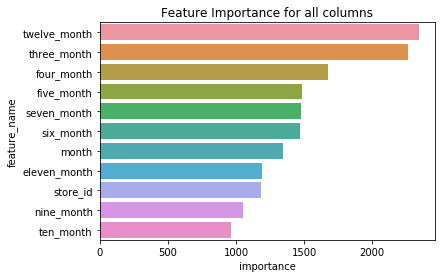

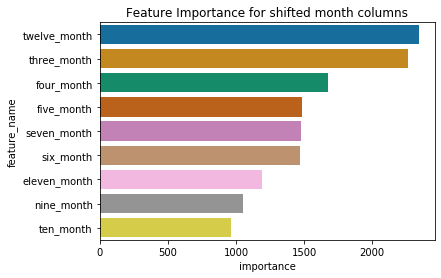

In [145]:


def plot_feature_importance(model):
                                                            #default = split importance_type='gain'
    feat_imp = pd.DataFrame([X_train[cols].columns, model.feature_importance()]).T
    feat_imp.columns = ['feature_name', 'feature_importance']
    feat_imp.sort_values(by='feature_importance', ascending=False, inplace=True)  
    ax= sns.barplot(y='feature_name', x= 'feature_importance', data= feat_imp )
    
    plt.xlabel('importance')
    plt.title('Feature Importance for all columns')
    plt.show()
    
    num_cols =['three_month','four_month','five_month','six_month', 
               'seven_month', 'eight_month', 'nine_month', 'ten_month','eleven_month','twelve_month']
    
    num =feat_imp[feat_imp.feature_name.isin(num_cols)]
    ax= sns.barplot(y='feature_name', x= 'feature_importance', data= num )
    
    plt.xlabel('importance')
    plt.title('Feature Importance for shifted month columns')
    plt.show()
    
    return num
#     feat_importances1 = pd.Series(model.feature_importance(), index=X_train[num_cols].columns)
#     feat_importances1.nlargest(10).sort_values(ascending = True).plot(kind='barh')
#     plt.xlabel('importance')
#     plt.title('Feature Importance for monthly shift')
#     plt.show()
    
    
f= plot_feature_importance(m)

In [153]:
#making a submission file 

# cols,m = lgbm_cv('seven_month')
def make_submission(model, test, name):
    #make prediction of 795 store to zero (only has 2 observations)
#     l = test.loc[(test.store_id == 795)].index
#     test.drop(index=l, inplace=True)
    
    test_pred_y = model.predict(test[cols])
    test_pred_y = np.exp(test_pred_y)
    test['amount'] =test_pred_y
    
    store= pd.DataFrame(data=[[795,0]],columns=['store_id', 'amount'])
    test= pd.concat([test,store])
    
    grouped_ww = test.groupby('store_id')['amount']
    
    submission = pd.DataFrame(grouped_ww.sum())
    

    submission.reset_index(inplace=True)
#     print(submission)
    submission.to_csv(str(name)+'.csv', index=False)
    
    
    return submission
    
sub= make_submission(m,test,'submission_full_median_LGBM_random_without_seven_bay')

sub


,store_id,amount
0,0,2.025892e+06
1,1,2.747444e+05
2,2,1.099727e+06
3,4,2.558132e+06
4,5,9.300070e+05
...,...,...
1962,2132,1.883898e+06
1963,2133,7.744315e+05
1964,2134,4.387981e+05
1965,2135,1.484432e+06


In [3]:
s = pd.read_csv('submission_mean_RF.csv')
s

,store_id,amount
0,0,1.930248e+06
1,1,2.830366e+05
2,2,1.136873e+06
3,4,2.378275e+06
4,5,9.158608e+05
...,...,...
1962,2132,1.825353e+06
1963,2133,5.238083e+05
1964,2134,4.291705e+05
1965,2135,1.454476e+06
